## Project:- Part 1-Sarcasm-Detection using NLTK 
                

##            Part 2- Sentiment Analysis

#### importing data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json",lines = True)

In [54]:
df_copy=pd.read_json("Sarcasm_Headlines_Dataset.json",lines = True)

In [11]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


we are droping article_link columns 

In [12]:
df.drop(['article_link'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [17]:
df.shape

(26709, 2)

In [13]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [15]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

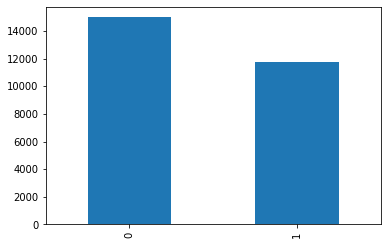

In [23]:
df['is_sarcastic'].value_counts().plot(kind='bar')
plt.show()

#### Any missing values?

In [18]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [24]:
df.columns

Index(['headline', 'is_sarcastic'], dtype='object')

In [25]:
df['len']=df['headline'].apply(len)

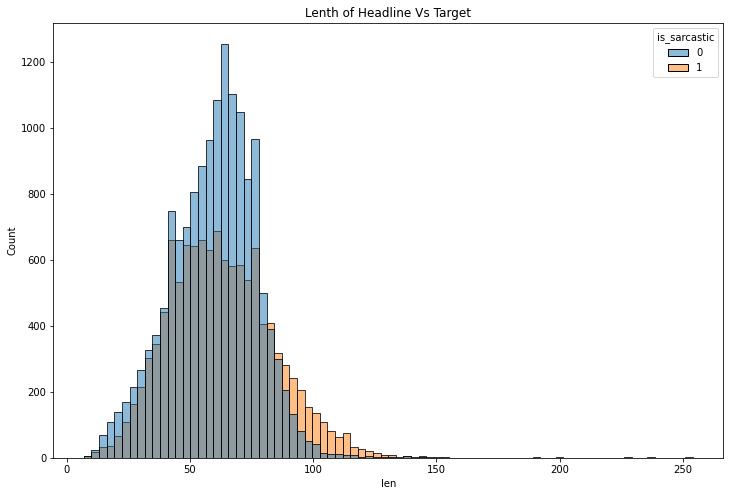

In [33]:
plt.figure(figsize=(12,8))
plt.title('Lenth of Headline Vs Target')
sns.histplot(x='len',data=df,hue='is_sarcastic',bins=80)
plt.show()

## Part 1 Sarcasm Detection

## Text Preprocessing

1.Removing Punctuations

2.Removing Stopwords

3.Vectorization

4.BAG(bag of words)

5.Tf-Idf(term frequency --inverse document frequenncy)


In [36]:
import nltk
import string
from nltk.corpus import stopwords
import re


In [38]:
df['headline'][2]

"mom starting to fear son's web series closest thing she will have to grandchild"

creating a function which removes stopwords and punctuations

In [39]:
def text_preprocess(mess):
    
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
df['headline'][:5].apply(text_preprocess)

0    [former, versace, store, clerk, sues, secret, ...
1    [roseanne, revival, catches, thorny, political...
2    [mom, starting, fear, sons, web, series, close...
3    [boehner, wants, wife, listen, come, alternati...
4    [jk, rowling, wishes, snape, happy, birthday, ...
Name: headline, dtype: object

try to apply this function to our whole dataframe

In [41]:
df['headline']=df['headline'].apply(text_preprocess)

In [42]:
df.head(10)

,headline,is_sarcastic,len
0,"[former, versace, store, clerk, sues, secret, ...",0,78
1,"[roseanne, revival, catches, thorny, political...",0,84
2,"[mom, starting, fear, sons, web, series, close...",1,79
3,"[boehner, wants, wife, listen, come, alternati...",1,84
4,"[jk, rowling, wishes, snape, happy, birthday, ...",0,64
5,"[advancing, worlds, women]",0,27
6,"[fascinating, case, eating, labgrown, meat]",0,46
7,"[ceo, send, kids, school, work, company]",0,67
8,"[top, snake, handler, leaves, sinking, huckabe...",1,50
9,"[fridays, morning, email, inside, trumps, pres...",0,59


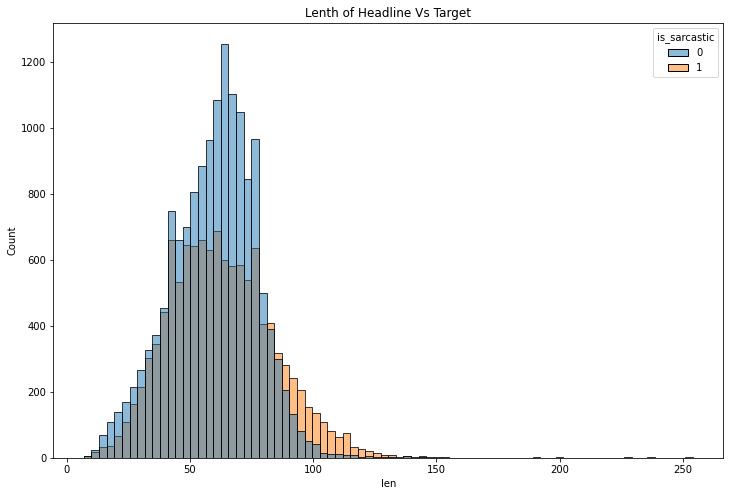

In [43]:
plt.figure(figsize=(12,8))
plt.title('Lenth of Headline Vs Target')
sns.histplot(x='len',data=df,hue='is_sarcastic',bins=80)
plt.show()

### Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(df['headline'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

26599


now let's take vector representation

In [77]:
messages_bow = bow_transformer.transform(df['headline'])

In [78]:
print(messages_bow)

  (0, 8922)	1
  (1, 20571)	1
  (2, 15534)	1
  (3, 3605)	1
  (4, 12220)	1
  (5, 1336)	1
  (6, 8290)	1
  (7, 4482)	1
  (8, 23782)	1
  (9, 9069)	1
  (10, 1446)	1
  (11, 8126)	1
  (12, 17054)	1
  (13, 1260)	1
  (14, 2867)	1
  (15, 17124)	1
  (16, 5655)	1
  (17, 22311)	1
  (18, 3549)	1
  (19, 5784)	1
  (20, 5738)	1
  (21, 24048)	1
  (22, 19254)	1
  (23, 21555)	1
  (24, 23121)	1
  :	:
  (26684, 20278)	1
  (26685, 7079)	1
  (26686, 597)	1
  (26687, 19440)	1
  (26688, 20088)	1
  (26689, 23116)	1
  (26690, 25315)	1
  (26691, 11368)	1
  (26692, 8724)	1
  (26693, 16365)	1
  (26694, 3787)	1
  (26695, 21131)	1
  (26696, 26579)	1
  (26697, 7568)	1
  (26698, 10244)	1
  (26699, 4112)	1
  (26700, 25810)	1
  (26701, 18122)	1
  (26702, 18209)	1
  (26703, 18778)	1
  (26704, 1701)	1
  (26705, 1764)	1
  (26706, 19690)	1
  (26707, 11855)	1
  (26708, 9872)	1


### TF-IDF

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf=tfidf_transformer.transform()
print(tfidf)

In [83]:
headlines_tfidf=tfidf=tfidf_transformer.transform(messages_bow)

In [84]:
print(headlines_tfidf)

  (0, 8922)	1.0
  (1, 20571)	1.0
  (2, 15534)	1.0
  (3, 3605)	1.0
  (4, 12220)	1.0
  (5, 1336)	1.0
  (6, 8290)	1.0
  (7, 4482)	1.0
  (8, 23782)	1.0
  (9, 9069)	1.0
  (10, 1446)	1.0
  (11, 8126)	1.0
  (12, 17054)	1.0
  (13, 1260)	1.0
  (14, 2867)	1.0
  (15, 17124)	1.0
  (16, 5655)	1.0
  (17, 22311)	1.0
  (18, 3549)	1.0
  (19, 5784)	1.0
  (20, 5738)	1.0
  (21, 24048)	1.0
  (22, 19254)	1.0
  (23, 21555)	1.0
  (24, 23121)	1.0
  :	:
  (26684, 20278)	1.0
  (26685, 7079)	1.0
  (26686, 597)	1.0
  (26687, 19440)	1.0
  (26688, 20088)	1.0
  (26689, 23116)	1.0
  (26690, 25315)	1.0
  (26691, 11368)	1.0
  (26692, 8724)	1.0
  (26693, 16365)	1.0
  (26694, 3787)	1.0
  (26695, 21131)	1.0
  (26696, 26579)	1.0
  (26697, 7568)	1.0
  (26698, 10244)	1.0
  (26699, 4112)	1.0
  (26700, 25810)	1.0
  (26701, 18122)	1.0
  (26702, 18209)	1.0
  (26703, 18778)	1.0
  (26704, 1701)	1.0
  (26705, 1764)	1.0
  (26706, 19690)	1.0
  (26707, 11855)	1.0
  (26708, 9872)	1.0


### Training a model

model traing without spliting our data into train and test 

In [3]:
#Multinomial NB Classifer are used

In [86]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(headlines_tfidf, df['is_sarcastic'])

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
y_pred=model.predict(headlines_tfidf)

In [89]:
print(y_pred)

[0 0 1 ... 0 0 0]


#### Model Evaluation

In [90]:
print(classification_report(df['is_sarcastic'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14985
           1       1.00      1.00      1.00     11724

   micro avg       1.00      1.00      1.00     26709
   macro avg       1.00      1.00      1.00     26709
weighted avg       1.00      1.00      1.00     26709



it's look like our model is more accurate 

In [93]:
df['y_pred']=pd.DataFrame(y_pred)

In [94]:
df.head()

,headline,is_sarcastic,len,y_pred
0,"[former, versace, store, clerk, sues, secret, ...",0,78,0
1,"[roseanne, revival, catches, thorny, political...",0,84,0
2,"[mom, starting, fear, sons, web, series, close...",1,79,1
3,"[boehner, wants, wife, listen, come, alternati...",1,84,1
4,"[jk, rowling, wishes, snape, happy, birthday, ...",0,64,0


In [95]:
df['y_pred'].value_counts()

0    14985
1    11724
Name: y_pred, dtype: int64

In [96]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

### Train Test Split

Now we are spliting our data into train and test set

In [98]:
X=df['headline']
y=df['is_sarcastic']

In [107]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['headline'], df['is_sarcastic'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

21367 5342 26709


## Building Pipeline

#### Multinomial NB classifier

In [110]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [111]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_preprocess at 0x00000173EA76D8B8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [112]:
predictions=pipeline.predict(msg_test)

#### Model Evaluation

In [113]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      5321
           1       0.01      1.00      0.02        21

   micro avg       0.56      0.56      0.56      5342
   macro avg       0.50      0.78      0.37      5342
weighted avg       1.00      0.56      0.72      5342



In [114]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
label_test

18543    1
10586    1
10299    0
8277     0
12568    0
        ..
14176    0
9427     1
19638    0
19984    1
5291     1
Name: is_sarcastic, Length: 5342, dtype: int64

## Part 2 - Sentiment Analysis

#### wheather sentiment is positive or negative

In [117]:
from textblob import TextBlob

In [121]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
df_copy['Subjectivity'] = df_copy['headline'].apply(getTextSubjectivity)
df_copy['Polarity'] = df_copy['headline'].apply(getTextPolarity)

In [122]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    
    else:
        return "Positive"
      

In [123]:
df_copy['Sentiment']=df_copy['Polarity'].apply(getTextAnalysis)
df_copy.head()

,article_link,headline,is_sarcastic,Subjectivity,Polarity,Sentiment
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,0.377778,-0.188889,Negative
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,0.400000,0.033333,Positive
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,0.100000,0.000000,Neutral
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,0.100000,0.200000,Positive
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,0.833333,0.600000,Positive


In [126]:
df_copy.drop(['article_link'],axis=1,inplace=True)

In [132]:
df_copy['Sentiment'].value_counts()

Neutral     13130
Positive     8515
Negative     5064
Name: Sentiment, dtype: int64

In [143]:
df_copy.groupby("Sentiment")['is_sarcastic'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Negative,5064.0,0.508096,0.499984,0.0,0.0,1.0,1.0,1.0
Neutral,13130.0,0.398858,0.489682,0.0,0.0,0.0,1.0,1.0
Positive,8515.0,0.459659,0.498399,0.0,0.0,0.0,1.0,1.0


In [146]:
df_copy[['Sentiment','is_sarcastic']]

,Sentiment,is_sarcastic
0,Negative,0
1,Positive,0
2,Neutral,1
3,Positive,1
4,Positive,0
...,...,...
26704,Neutral,0
26705,Positive,0
26706,Neutral,0
26707,Neutral,0


In [ ]:
e

In [147]:
df_copy.corr()['']

,is_sarcastic,Subjectivity,Polarity
is_sarcastic,1.000000,0.077778,-0.038401
Subjectivity,0.077778,1.000000,0.133716
Polarity,-0.038401,0.133716,1.000000
